# Raw data to clean data conversion using Python EDA

EDA is the process of analyzing and summarizing data before using it for machine learning, 

business intelligence, or any kind of decision-making. It involves:

✅ Detecting missing values ✅ Identifying outliers

✅ Handling duplicate data ✅ Standardizing & normalizing data

✅ Visualizing patterns

EDA helps us understand our data and decide what preprocessing steps are needed before we apply machine learning models.

## Step 1: Understanding the Data 📊

Before cleaning, let’s first understand what we are dealing with:

🔹 Load the dataset: Use Python libraries like Pandas to import CSV or Excel files.

In [2]:
import pandas as pd


Use the following links on different methods to clean data and perform EDA
- https://sourabhm9050.medium.com/how-to-clean-data-the-eda-process-7d5f38f7a266
- https://github.com/Li-ChangC/Data-Cleaning-and-EDA-Portfolio
- https://www.geeksforgeeks.org/reading-excel-file-using-python/
- https://www.marktechpost.com/2025/04/11/complete-guide-working-with-csv-excel-files-and-eda-in-python/
- https://www.geeksforgeeks.org/python-reading-excel-file-using-openpyxl-module/
- https://www.youtube.com/watch?v=tTT7XJO30cM&t=4371s

In [3]:
# Here we are to use pandas to read an excel file and get the data into memory
df = pd.read_excel(r'D:\Dropbox\DS & AI\Full stack DS and AI course\20 May\Rawdata.xlsx')
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


🔹 Check dataset structure (df.info()) 
This will show column names, data types, and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [5]:
df.columns # columns of the dataframe

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [6]:
df.shape # 

(6, 6)

In [7]:
df.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [8]:
df.tail()

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


🔹 Basic statistics:
This provides summary statistics for numerical features.

In [10]:
df.describe()

,Name,Domain,Age,Location,Salary,Exp
count,6,6,4,4,6,5
unique,6,6,4,4,6,5
top,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
freq,1,1,1,1,1,1


In [11]:
df['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [12]:
df['Location'] # checking for the column ' Location'

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

## Step 2: Handling Missing Data 🚨

Missing values are common in real-world datasets. We can:
- Find missing values: df.isnull().sum()
- Drop rows with missing values:df.dropna(inplace=True)
- Fill missing values with mean/median/mode:df['column_name'].fillna(df['column_name'].median(), inplace=True)

Choosing between dropping and filling depends on data size and context. 

For smaller datasets, imputing values is often better than dropping rows.

## Step 3: Removing Duplicates 🗑️

Duplicate entries can distort analysis. Identify and remove them:

df.duplicated().sum()  # Count duplicates

df.drop_duplicates(inplace=True)  # Remove duplicates

## Step 4: Handling Outliers 🚀

Outliers can skew analysis and predictions. Detect them using:

🔹 Boxplots:

import seaborn as sns

sns.boxplot(x=df['column_name'])

🔹 Interquartile Range (IQR) Method:

Q1 = df['column_name'].quantile(0.25)

Q3 = df['column_name'].quantile(0.75)

IQR = Q3 - Q1

- Define outlier bounds

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

- Remove outliers

df = df[(df['column_name'] >= lower_bound) & (df['column_name'] <= upper_bound)]

## Step 5: Data Standardization & Normalization ⚖️

Some models require features to be on a similar scale.

🔹 Standardization (Z-score normalization):

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['column_name']] = scaler.fit_transform(df[['column_name']])

🔹 Normalization (Min-Max scaling):

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['column_name']] = scaler.fit_transform(df[['column_name']])

Choose based on your use case 

— Standardization is better for normally distributed data, while Normalization is good for skewed data.

## Step 6: Data Visualization 🎨

To understand patterns, visualize data using:

🔹 Histogram:

import matplotlib.pyplot as plt

df['column_name'].hist(bins=30)

plt.show()

🔹 Pairplot for feature relationships:

import seaborn as sns

sns.pairplot(df)

🔹 Correlation Heatmap:

plt.figure(figsize=(10,6))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

Visualization helps in understanding relationships and detecting anomalies in data.

*** Final Thoughts 💡

Cleaning data is half the battle in analytics and machine learning. 

Without a proper EDA process, even the best models won’t perform well.


In [13]:
# Let us do practicals then: 
df.isnull() # check for null values

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [14]:
# check for null values
df.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [15]:
df['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [16]:
# Let us clean the column names by removing the special characters and numbers.
df['Name'] = df['Name'].str.replace(r'\W','', regex=True) 

In [17]:
df['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [18]:
# Let us do the same 
# df['Domain'] = df['Domain'].str.replace(r'\W','', regex=True) 
df['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [19]:
# For age
df['Age']

0    34 years
1      45' yr
2         NaN
3         NaN
4       67-yr
5        55yr
Name: Age, dtype: object

In [20]:
df['Age'] = df['Age'].str.replace(r'\W','', regex=True) 
df['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

In [21]:
# But still not clean
df['Age'] = df['Age'].str.extract('(\d+)')
df['Age']


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell\AppData\Local\Temp\ipykernel_22704\1107607154.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Age'] = df['Age'].str.extract('(\d+)')


0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [22]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34,Mumbai,5^00#0,2+
1,Teddy,Testing,45,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67,NaN,30000-,5+ year
5,Kim,NLP,55,Delhi,6000^$0,10+


In [23]:
df['Location'] = df['Location'].str.replace(r'\W','', regex=True) 
df['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [24]:
df['Salary']

0     5^00#0
1    10%%000
2    1$5%000
3     2000^0
4     30000-
5    6000^$0
Name: Salary, dtype: object

In [25]:
df['Salary'] = df['Salary'].str.replace(r'\W','')


In [26]:
df['Salary']

0     5^00#0
1    10%%000
2    1$5%000
3     2000^0
4     30000-
5    6000^$0
Name: Salary, dtype: object

In [27]:
# The above does not work;
# Let us use the following instead
# regex=True is used to replace all noise characters with nothing
df['Salary'] = df['Salary'].str.replace(r'\W','', regex=True)

In [28]:
df['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [29]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,15000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [30]:
df['Exp']

0         2+
1         <3
2     4> yrs
3        NaN
4    5+ year
5        10+
Name: Exp, dtype: object

In [31]:
# For this variable, we will use the str.extract('(\d+)')
# This code will extract the first number from the string and convert it to an integer.
# The result will be stored in the 'Exp' column.
df['Exp'] = df['Exp'].str.extract('(\d+)')      

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell\AppData\Local\Temp\ipykernel_22704\3231838853.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Exp'] = df['Exp'].str.extract('(\d+)')


In [32]:
df['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [33]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst^^#,NaN,NaN,15000,4
3,Jane,Ana^^lytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [34]:
df['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [35]:
df['Domain'] = df['Domain'].str.replace(r'\W','', regex=True)

In [36]:
df['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [37]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


Till now we have raw data we use regex to clean the data and removed all those non numerical characters from the dataset.

The same technique is used in sql query to remove the non numerical characters from the dataset 


In [38]:
# missing values treatment for numerical data 
clean_df = df.copy()

In [39]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [40]:
clean_df['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [41]:
import numpy as np 

In [42]:
# Fill missing values with mean/median/mode:df['column_name'].fillna(df['column_name'].np.mean(pd.to_numeric(clean_df['Age'])))
clean_df['Age'] = clean_df['Age'].fillna(np.mean(pd.to_numeric(clean_df['Age'])))

In [43]:
clean_df['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [44]:
# Let us use the median
# The output is fortunately identical to the previous one
clean_df['Age'] = clean_df['Age'].fillna(np.median(pd.to_numeric(clean_df['Age'])))

In [45]:
clean_df['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [46]:
clean_df['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [47]:
clean_df['Exp'] = clean_df['Exp'].fillna(np.mean(pd.to_numeric(clean_df['Exp'])))

In [48]:
clean_df['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [49]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [50]:
clean_df['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [51]:
# Missing values for the Location column
clean_df['Location'].isnull().sum()

2

In [52]:
# Let us use the mode strategy to fill the missing values in the dataset.
# The mode is the value that appears most frequently in the dataset.
# For categorical variable missing treatment, the mode must appear the last in the code with 0 as default value and mandatory
clean_df['Location'] = clean_df['Location'].fillna(clean_df['Location'].mode()[0])

In [53]:
clean_df['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [54]:
# Let us check again our dataset
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [55]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [56]:
# By default, Python gives data as object type
# We can change the data type: Name, Domain and Location are categories 
# Age, salary and salary are numerical data
# Let us change the data type of the Age column to integer type
clean_df['Age'] = clean_df['Age'].astype(int)

In [57]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: int32(1), object(5)
memory usage: 396.0+ bytes


In [58]:
# Let us do the same for salary and experience columns
clean_df['Salary'] = clean_df['Salary'].astype(int)
clean_df['Exp'] = clean_df['Exp'].astype(int)

In [59]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int32 
 5   Exp       6 non-null      int32 
dtypes: int32(3), object(3)
memory usage: 348.0+ bytes


In [60]:
# Let us change the data type for the other three columns into categorical data type
clean_df['Name'] = clean_df['Name'].astype('category')
clean_df['Domain'] = clean_df['Domain'].astype('category')
clean_df['Location'] = clean_df['Location'].astype('category')

In [61]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 866.0 bytes


In [62]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [63]:
# I can now save the clean dataset into my system as a csv file
clean_df.to_csv('clean_data.csv')


In [64]:
import os # 
os.getcwd()

'd:\\Dropbox\\DS & AI\\Full stack DS and AI course\\20 May'

In [65]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [66]:
# That is the end of data cleansing and exploratory data analysis, a very important part of the data science process.
# Then we can do visualization and modeling.

# Data visualization 
 
 We will use the following libraries for visualization: 

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

In [67]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns

In [68]:
import warnings # to ignore warnings
warnings.filterwarnings('ignore') # to ignore warnings

In [69]:
clean_df['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

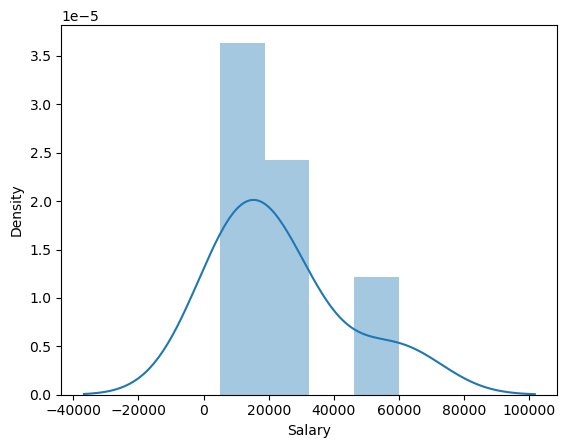

In [93]:
Plt1 = sns.distplot(clean_df['Salary']) # univariate analysis


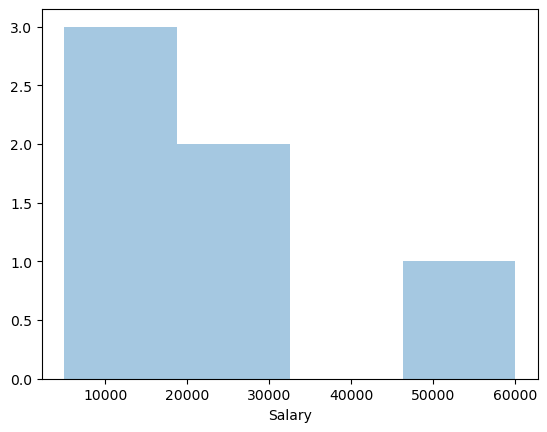

In [94]:
Plt12 = sns.distplot(clean_df['Salary'], kde=False) # univariate 

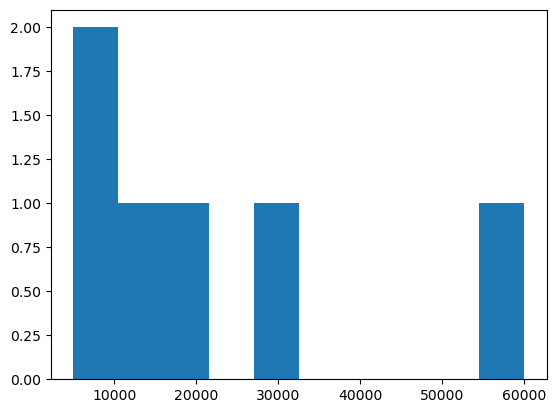

In [71]:
Plt2 = plt.hist(clean_df['Salary'])

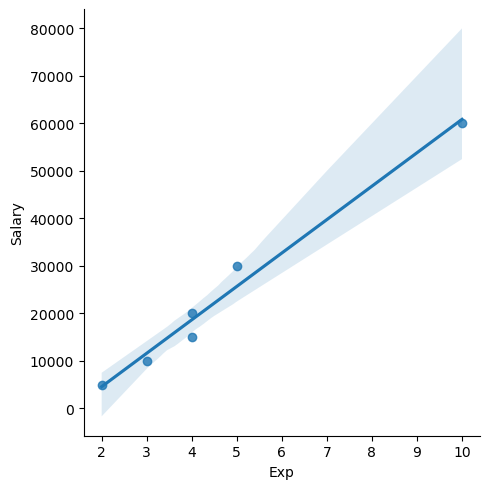

In [72]:
Plt3 = sns.lmplot(data=clean_df,x = 'Exp', y='Salary')

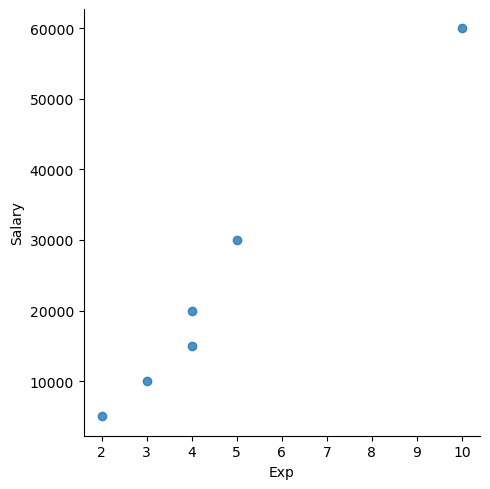

In [73]:
Plt4 = sns.lmplot(data=clean_df,x = 'Exp', y='Salary', fit_reg = False)

In [74]:
clean_df[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [75]:
clean_df[0:6:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [76]:
clean_df[::-1]

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


In [77]:
clean_df.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [96]:
# Before developing the ML model, we need to split into independent and dependent variables. 
# The dependent variable is the variable that we want to predict. 
# The independent variables are the variables that we use to predict the dependent variable. 
x_iv = clean_df[['Name', 'Domain', 'Age', 'Location', 'Exp']]
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [79]:
y_dv = clean_df[['Salary']]
# Dependent variable

In [80]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [81]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [82]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [83]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [84]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [85]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Imputation
Called also embedding or transformer

Three types:

DUMMY VARIABLE 

ONE HOT ENCODER

LABEL ENCODER

In [97]:
imputation = pd.get_dummies(clean_df)
imputation
# Here, we are converting the categorical variables into dummy variables(embedding)


,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [98]:
imputation = pd.get_dummies(clean_df, dtype=int)
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [88]:
clean_df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [89]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [99]:
# With this dataset, you can apply future scaling